## Analyzing parents' choice of baby names over the course of last 140 years in the US

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

## Getting the data

In [4]:
dfs = []
for f in os.listdir('names'):
    # we only want txt files, not the pdf
    if f[-4:] != '.txt': continue
    df = pd.read_csv('names/' + f, header=None, names=('name', 'gender', 'count'))
    # get the year for each file and add it as a column
    df['year'] = int(f[3:7])
    dfs.append(df)

In [5]:
# concatenate along axis 0 to merge them together in the right way
df = pd.concat(dfs, axis=0)

In [6]:
df

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31266,Zykell,M,5,2020
31267,Zylus,M,5,2020
31268,Zymari,M,5,2020
31269,Zyn,M,5,2020


## What names are most popular overall?

In [7]:
total_counts = df.groupby('name')['count'].sum().sort_values(ascending=False)

### Top 10 most common names across all years

In [8]:
print(total_counts[:10])

name
James      5213689
John       5163958
Robert     4849738
Michael    4405274
William    4159868
Mary       4145486
David      3651803
Joseph     2641826
Richard    2578808
Charles    2418011
Name: count, dtype: int64


### Barplot of the top 10 common names

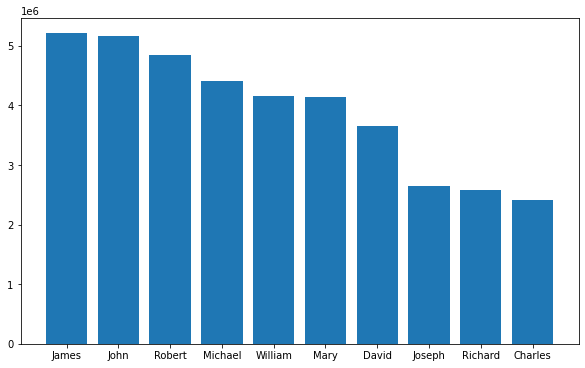

In [10]:
top_10 = total_counts[:10]
plt.figure(figsize=(10,6))
plt.bar(top_10.index, top_10.values)
plt.show()

### Line plot showing total for each name sorted from highest to lowest

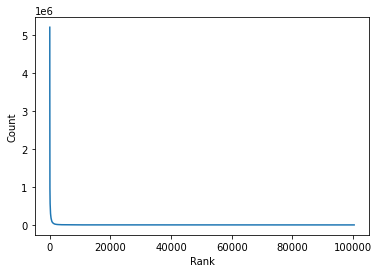

In [11]:
plt.plot(np.arange(len(total_counts)), total_counts.values)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

### Using the log scale to plot the same graph as above

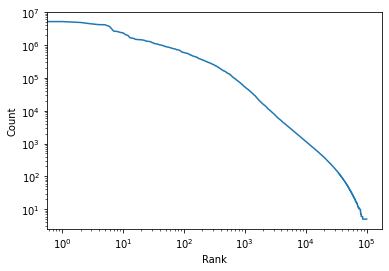

In [12]:
plt.plot(np.arange(len(total_counts)), total_counts.values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

In [13]:
(total_counts > 1e6).sum()

42

So 42 names have been used over a million times

## When was each name popular?

### Getting the count of how many times a particular name was used in an year

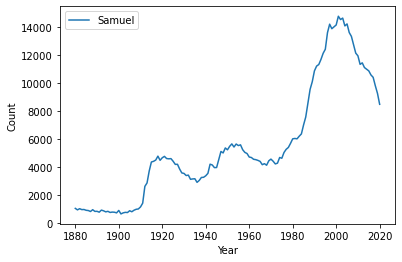

In [14]:
name = 'Samuel'
selection = df.loc[(df['name'] == name) & (df['gender'] == 'M')]
plt.plot(selection['year'], selection['count'], label=name)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

### Doing the same for the top 10 most common names

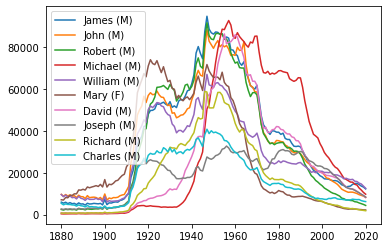

In [17]:
# loop over the top 10 names
for name in total_counts[:10].index:
    # get it for male and female and use whichever is larger
    female = df.loc[(df['name'] == name) & (df['gender'] == 'F')]
    male = df.loc[(df['name'] == name) & (df['gender'] == 'M')]
    if female['count'].sum() > male['count'].sum(): 
        selection = female
        label = name + ' (F)'
    else: 
        selection = male
        label = name + ' (M)'
    # plot using the same code
    plt.plot(selection['year'], selection['count'], label=label)
plt.legend()
plt.show()

They all peak at the same time because of the baby boom, which occurs from 1945-1965.

## Since most of the top 10 names are men's, let's look at women's names

### Creating seperate dataframes for men's and women's names

In [23]:
total_counts_M = df.loc[df['gender'] == 'M'].groupby('name')['count'].sum().sort_values(ascending=False)
total_counts_F = df.loc[df['gender'] == 'F'].groupby('name')['count'].sum().sort_values(ascending=False)

### Plotting the 2 dfs to compare them

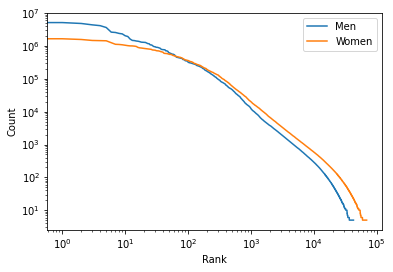

In [27]:
plt.plot(np.arange(len(total_counts_M)), total_counts_M.values, label='Men')
plt.plot(np.arange(len(total_counts_F)), total_counts_F.values, label='Women')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.legend()
plt.show()

The line for men's names is higher for the most common names and lower for the less common ones, while for women, it's the opposite: that means that there is slightly more variety in women's names across time.

### Plotting the top 10 women's names

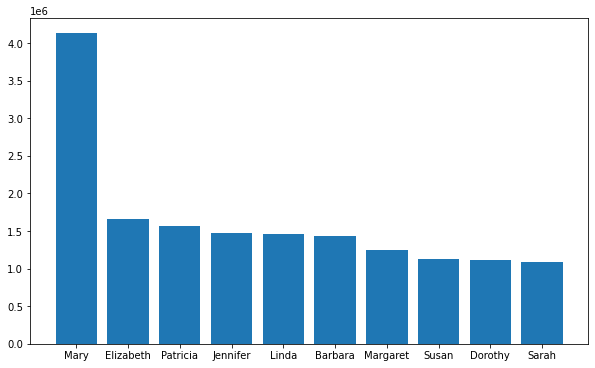

In [26]:
top_10 = total_counts_F[:10]
plt.figure(figsize=(10,6))
plt.bar(top_10.index, top_10.values)
plt.show()